# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("", "output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities[:5]

['amqui', 'hokitika', 'tiksi', 'dalhousie', 'belushya guba']

In [5]:
units = "imperial"

city = cities[0]
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

from pprint import pprint
pprint(weather_json)

#City          547
#Cloudiness    547
#Country       547
#Date          547
#Humidity      547
#Lat           547
#Lng           547
#Max Temp      547
#Wind Speed    547
print(weather_json['clouds']['all'])
print(weather_json['sys']['country'])
print(weather_json['dt'])
print(weather_json['main']['humidity'])
print(weather_json['coord']['lat'])
print(weather_json['coord']['lon'])
print(weather_json['main']['temp_max'])
print(weather_json['wind']['speed'])

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 48.47, 'lon': -67.43},
 'dt': 1554255056,
 'id': 6943488,
 'main': {'humidity': 51,
          'pressure': 1022,
          'temp': 38.48,
          'temp_max': 39.99,
          'temp_min': 37.4},
 'name': 'Amqui',
 'sys': {'country': 'CA',
         'id': 1003,
         'message': 0.0056,
         'sunrise': 1554199557,
         'sunset': 1554246024,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 4.7}}
40
CA
1554255056
51
48.47
-67.43
39.99
4.7


In [6]:
#### Openweathermap api restricted to 60 calls per minute.  Breakup data and perform timing breaks
# to prevent exceeding 60 calls per minute

def get_weather_results(cities, units = "imperial"):
    
    SUCCESSFUL_API_CALL = 200 # Successful API code 

    # Helper functions
    def divide_chunks(l, n): 

        # looping till length l 
        for i in range(0, len(l), n):  
            yield l[i:i + n] 

    def print_separator(what="-", length=40):
        print(what*length)
    
    city_chunks = list(divide_chunks(cities, 60))

    weather_results = []

    print("Beginning Data Retrieval")
    print_separator()
    
    chunk_number = 1
    for chunk in city_chunks:
        city_number = 1
        for city in chunk:
        
            # Build query URL and request your results in requested units
            query_url = f"{url}appid={api_key}&q={city}&units={units}"

            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
        
            if weather_json['cod'] == SUCCESSFUL_API_CALL:
                print(f"Processing Record {city_number} of Set {chunk_number} | {city}")
                weather_results.append({'City' : city,\
                                        'Cloudiness' : weather_json['clouds']['all'],\
                                        'Country' : weather_json['sys']['country'],\
                                        'Date' : weather_json['dt'],\
                                        'Humidity' : weather_json['main']['humidity'],\
                                        'Lat' : weather_json['coord']['lat'],\
                                        'Lng' : weather_json['coord']['lon'],\
                                        'Max Temp' : weather_json['main']['temp_max'],\
                                        'Wind Speed' : weather_json['wind']['speed']})
            else:
                print(f"{weather_json['message']}.  Skipping...")
                      
            # Add a one second interval between queries to stay within API query limits
            time.sleep(1)
                  
            city_number += 1
        chunk_number += 1
    
    print_separator()
    print("Data Retrieval Complete")                  
    print_separator()
    
    return weather_results

# Get the results
weather_results = get_weather_results(cities)


Beginning Data Retrieval
----------------------------------------
Processing Record 1 of Set 1 | amqui
Processing Record 2 of Set 1 | hokitika
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | dalhousie
city not found.  Skipping...
Processing Record 6 of Set 1 | calama
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | rabo de peixe
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | bilma
city not found.  Skipping...
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | kurumkan
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | upernavik
city not found.  Skipping...
Processing Record 22 of Set 1 | kodiak
Processing Record 23 of Set 1 | albany
city not found.  Skipping...
Proce

Processing Record 27 of Set 4 | abu samrah
Processing Record 28 of Set 4 | ilulissat
Processing Record 29 of Set 4 | along
Processing Record 30 of Set 4 | alyangula
Processing Record 31 of Set 4 | avarua
Processing Record 32 of Set 4 | broome
Processing Record 33 of Set 4 | san luis
Processing Record 34 of Set 4 | krasnogorskiy
Processing Record 35 of Set 4 | santa rita do passa quatro
Processing Record 36 of Set 4 | mangrol
Processing Record 37 of Set 4 | lixourion
Processing Record 38 of Set 4 | nizhneangarsk
city not found.  Skipping...
Processing Record 40 of Set 4 | lere
Processing Record 41 of Set 4 | seoul
city not found.  Skipping...
Processing Record 43 of Set 4 | iskateley
city not found.  Skipping...
Processing Record 45 of Set 4 | armidale
Processing Record 46 of Set 4 | biga
Processing Record 47 of Set 4 | amberley
city not found.  Skipping...
Processing Record 49 of Set 4 | erzin
Processing Record 50 of Set 4 | port jervis
Processing Record 51 of Set 4 | lorengau
Processi

Processing Record 54 of Set 7 | champerico
Processing Record 55 of Set 7 | chengde
Processing Record 56 of Set 7 | vestmannaeyjar
Processing Record 57 of Set 7 | tezu
Processing Record 58 of Set 7 | grand gaube
Processing Record 59 of Set 7 | garden city
Processing Record 60 of Set 7 | faya
city not found.  Skipping...
Processing Record 2 of Set 8 | belyy yar
Processing Record 3 of Set 8 | carballo
Processing Record 4 of Set 8 | poso
Processing Record 5 of Set 8 | tevriz
Processing Record 6 of Set 8 | ossora
Processing Record 7 of Set 8 | takaka
Processing Record 8 of Set 8 | hervey bay
Processing Record 9 of Set 8 | kenai
Processing Record 10 of Set 8 | novosergiyevka
Processing Record 11 of Set 8 | kalmunai
Processing Record 12 of Set 8 | glens falls
Processing Record 13 of Set 8 | khorramshahr
Processing Record 14 of Set 8 | san cristobal
Processing Record 15 of Set 8 | wanning
Processing Record 16 of Set 8 | verkhnevilyuysk
Processing Record 17 of Set 8 | juba
Processing Record 18 

In [8]:
failed_city = cities[4]

query_url = f"{url}appid={api_key}&q={failed_city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

weather_response.json()

{'cod': '404', 'message': 'city not found'}

In [9]:
len(weather_results)

536

In [10]:
# For additional tinkering - don't make all the api requests again.
# Save the retrieved data with store_data
# we can restore when needed later with load_data

import pickle

def store_data(data, filename):
    data_file = open(filename, 'ab') 
          
    # source, destination 
    pickle.dump(data, data_file)                      
    data_file.close()

def load_data(filename):
    # for reading also binary mode is important 
    data_file = open(filename, 'rb')      
    data = pickle.load(data_file) 
    data_file.close() 
    
    return data

store_data(weather_results, "weather_results_pickle")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

In [11]:
weather_results[0]

{'City': 'amqui',
 'Cloudiness': 40,
 'Country': 'CA',
 'Date': 1554255056,
 'Humidity': 51,
 'Lat': 48.47,
 'Lng': -67.43,
 'Max Temp': 39.99,
 'Wind Speed': 4.7}

In [12]:
weather_df = pd.DataFrame(weather_results)
#print(weather_df.shape)
#print(weather_df.columns)

In [24]:
from datetime import datetime
ts = weather_results[100]['Date']

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y'))


04/03/2019


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_df.to_csv(output_data_file)

In [16]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,amqui,40,CA,1554255056,51,48.47,-67.43,39.99,4.70
1,hokitika,0,NZ,1554255343,92,-42.72,170.96,59.96,4.70
2,tiksi,48,RU,1554255344,81,71.64,128.87,17.57,3.91
3,dalhousie,0,IN,1554255345,39,32.54,75.98,56.18,2.24
4,calama,0,CL,1554253200,41,-22.46,-68.93,59.00,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

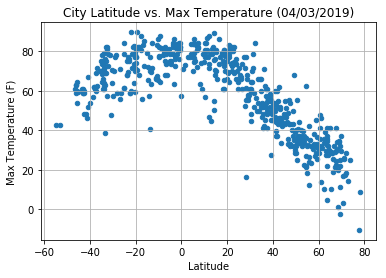

In [33]:
# For the plot titles, get the date the data was retrived:
from datetime import datetime
ts = weather_results[0]['Date'] #openweathmap api returns GMT unix timestamp

retrieval_date = datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')

ax = weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,\
                     title=f"City Latitude vs. Max Temperature ({retrieval_date})")

# suppress the printed object output with '_ = '
_ = ax.set(xlabel = "Latitude", ylabel = "Max Temperature (F)")

#### Latitude vs. Humidity Plot

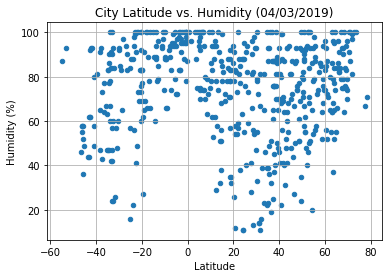

In [28]:
ax = weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,\
                     title=f"City Latitude vs. Humidity ({retrieval_date})")
_ = ax.set(xlabel = "Latitude", ylabel = "Humidity (%)")

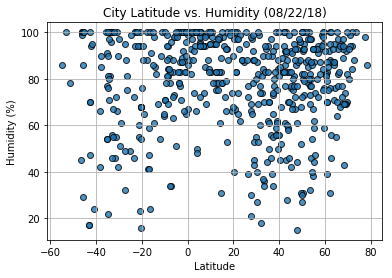

#### Latitude vs. Cloudiness Plot

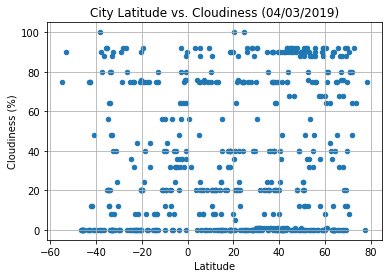

In [34]:
ax = weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,\
                     title=f"City Latitude vs. Cloudiness ({retrieval_date})")
_ = ax.set(xlabel = "Latitude", ylabel = "Cloudiness (%)")

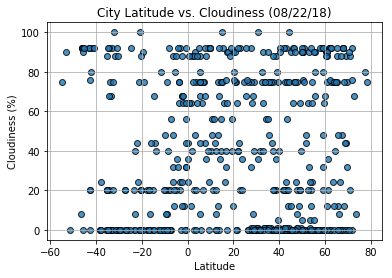

#### Latitude vs. Wind Speed Plot

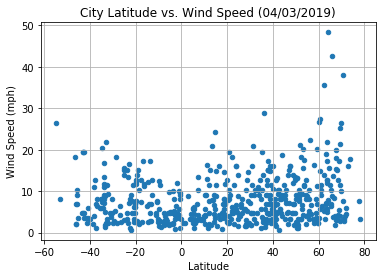

In [35]:
ax = weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,\
                     title=f"City Latitude vs. Wind Speed ({retrieval_date})")
_ = ax.set(xlabel = "Latitude", ylabel = "Wind Speed (mph)")

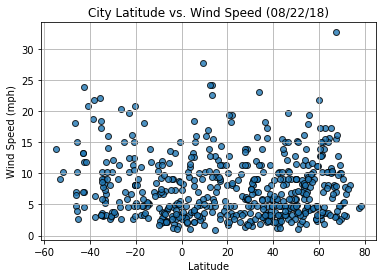